<a href="https://colab.research.google.com/github/abdala9512/nlp-evaluacion-problemas-sociales/blob/main/src/notebooks/Evaluacion_problemas_sociales_PLN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Proyecto NLP - Evaluacion de problemas solciales**

---



---



<img src="https://upload.wikimedia.org/wikipedia/commons/6/6c/Javeriana.svg">

---



---


##Integrantes:

*   **Laura Vanessa Peñaranda**
* **Leonardo Neira**
* **Omar balcero**
* **Miguel Arquez Abdala**

---



---

##**Analisis Exploratorio**

###Import Librerias

In [ ]:
!pip install Unidecode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
from scipy.stats import kurtosis
from scipy.stats import skew
import matplotlib.pyplot as plt
import nltk
import pdb
import re
import string
import unidecode
from unidecode import unidecode
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from nltk.stem import PorterStemmer
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Instalacion de complementos

In [ ]:
!pip3 install pandas_profiling --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Montar Drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Cargue de datos

In [ ]:
#df_nlp=pd.read_csv("",delimiter=";",on_bad_lines='skip')


In [ ]:
df_nlp.head(10)

,Problem,3655,"Deficiencia en las reglas, protocolos y procesos de la corresponsabilidad entre la Nación y demás entes territoriales del país en la implementación de la política para víctimas y demás actores del conflicto"
0,Effect,18181.0,Descoordinación institucional en el tema de at...
1,Effect,18182.0,Ineficiencia e ineficacia en la atención a víc...
2,Effect,18183.0,Inequidad social
3,Effect,18626.0,Baja capacidad de las entidades territoriales ...
4,Cause,14455.0,Baja coordinación entre la Nación y las entida...
5,Cause,14879.0,Sistema de corresponsabilidad es un tema recie...
6,Problem,488.0,ESCASAS INICIATIVAS PRODUCTIVAS PARA INCENTIVA...
7,Effect,1849.0,INCREMENTO DE LA POBLACION EN CONDICIONES DE D...
8,Effect,1850.0,BAJOS INGRESOS PARA LAS FAMILIAS VICTIMAS DEL ...
9,Effect,1851.0,BAJA CALIDA DE VIDA DE LAS VICTIMAS DEL CONFLICTO


**Mostrar todos los resultados completos de un Data Frame**

In [ ]:
pd.set_option('max_rows', 99999)
pd.set_option('max_colwidth', 9999)
pd.set_option('display.max_columns', None)
pd.describe_option('max_colwidth')

display.max_colwidth : int or None
    The maximum width in characters of a column in the repr of
    a pandas data structure. When the column overflows, a "..."
    placeholder is embedded in the output. A 'None' value means unlimited.
    [default: 50] [currently: 9999]


In [ ]:
df_nlp.head(10)

,Problem,3655,"Deficiencia en las reglas, protocolos y procesos de la corresponsabilidad entre la Nación y demás entes territoriales del país en la implementación de la política para víctimas y demás actores del conflicto"
0,Effect,18181,Descoordinación institucional en el tema de atención a víctimas
1,Effect,18182,Ineficiencia e ineficacia en la atención a víctimas del conflicto armado por parte de los entes territoriales
2,Effect,18183,Inequidad social
3,Effect,18626,Baja capacidad de las entidades territoriales implementación de la política de víctimas
4,Cause,14455,Baja coordinación entre la Nación y las entidades territoriales en materia de atención a la población víctimas y actores del conflicto armado
5,Cause,14879,Sistema de corresponsabilidad es un tema reciente para el país
6,Problem,488,ESCASAS INICIATIVAS PRODUCTIVAS PARA INCENTIVAR A FAMILIAS VICTMAS DEL CONFLICTO PARA LA GENERACION DE INGRESOS
7,Effect,1849,INCREMENTO DE LA POBLACION EN CONDICIONES DE DESPLAZAMIENTO EN LOS CENTROS POBLADOS
8,Effect,1850,BAJOS INGRESOS PARA LAS FAMILIAS VICTIMAS DEL CONFLICTO
9,Effect,1851,BAJA CALIDA DE VIDA DE LAS VICTIMAS DEL CONFLICTO


In [ ]:
df_nlp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13036 entries, 0 to 13035
Data columns (total 3 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                          --------------  -----  
 0   Problem                                                                                                                                                                                                         13036 non-null  object 
 1   3655                                                                                                                                                                            

**Funcion Para remover caracteres especiales y pasar a minuscula**

In [ ]:
import re
def removePunctuation(text):
    """Removes punctuation, changes to lower case, and strips leading and trailing spaces.
 
    Note:
        Only spaces, letters, and numbers should be retained.  Other characters should should be
        eliminated (e.g. it's becomes its).  Leading and trailing spaces should be removed after
        punctuation is removed.
 
    Args:
        text (str): A string.
 
    Returns:
        str: The cleaned up string.
    """
    text=re.sub(r'[^a-zA-Z0-9 ]','', text)
    
    return text.lower().strip()

**Tratando la Data**

In [ ]:
df_nlp.rename({'Deficiencia en las reglas, protocolos y procesos de la corresponsabilidad entre la Nación y demás entes territoriales del país en la implementación de la política para víctimas y demás actores del conflicto': 'deficiencia_reglas'}, axis=1,inplace=True)

In [ ]:
df_nlp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13036 entries, 0 to 13035
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Problem             13036 non-null  object
 1   3655                13033 non-null  Int64 
 2   deficiencia_reglas  13033 non-null  object
dtypes: Int64(1), object(2)
memory usage: 318.4+ KB


In [ ]:
df_nlp.head(2)

,Problem,3655,deficiencia_reglas
0,Effect,18181,Descoordinación institucional en el tema de atención a víctimas
1,Effect,18182,Ineficiencia e ineficacia en la atención a víctimas del conflicto armado por parte de los entes territoriales


In [ ]:
df_nlp['3655']=df_nlp['3655'].astype('Int64')

In [ ]:
df_nlp['Problem']=df_nlp['Problem'].apply(lambda x: removePunctuation(x))

In [ ]:
df_nlp.head(2)

,Problem,3655,deficiencia_reglas
0,effect,18181,Descoordinación institucional en el tema de atención a víctimas
1,effect,18182,Ineficiencia e ineficacia en la atención a víctimas del conflicto armado por parte de los entes territoriales


**Valores Unicos**

In [ ]:
df_nlp.Problem.value_counts()

effect     5976
cause      5307
problem    1753
Name: Problem, dtype: int64

In [ ]:
df_nlp.deficiencia_reglas.value_counts().head(20)

Aumento de tiempos de viaje                                                                      355
Aumento en los costos de transporte de carga y pasajeros                                         215
Deterioro de las vías                                                                            164
Deserción escolar                                                                                128
Incremento de precios de los alimentos                                                           127
Escaso mantenimiento de la vía                                                                   123
Inoportuno acceso a servicios médicos                                                            112
Baja oferta y demanda de productos y transporte de la vereda                                      93
Deficiente drenaje de escorrentía                                                                 90
Baja comercialización de productos del municipio                                           

In [ ]:
df_nlp['3655'].value_counts().head(10)

3087     10
12537     8
12535     8
12534     8
15801     8
15800     8
15799     8
15798     8
12536     8
2489      8
Name: 3655, dtype: Int64

**Pandas profiling Inicial**

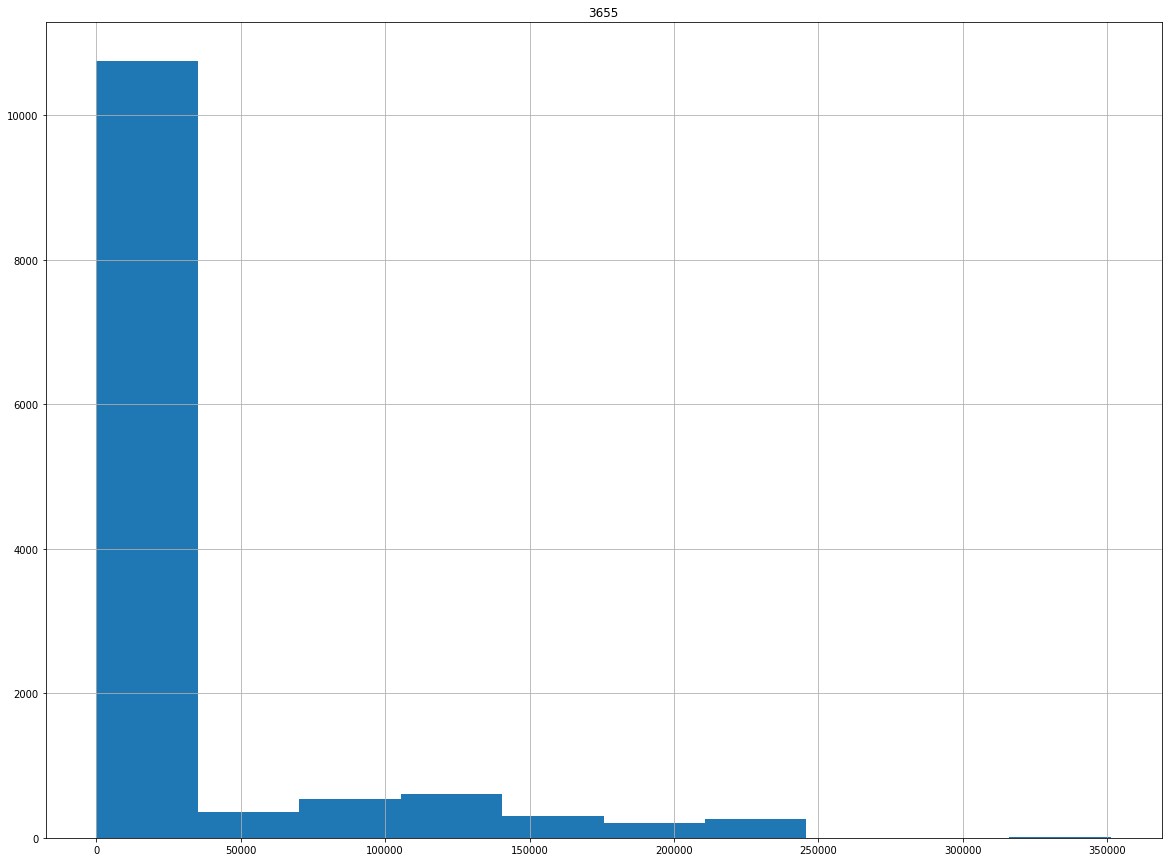

In [ ]:
a=df_nlp.hist(figsize=(20, 15))

In [ ]:
#from pandas_profiling import ProfileReport
#prof = ProfileReport(df_nlp)
#prof.to_file(output_file='nlp.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Eliminar Nulos**

In [ ]:
sum(df_nlp.deficiencia_reglas.isnull())

0

In [ ]:
df_nlp = df_nlp.dropna()

In [ ]:
sum(df_nlp.deficiencia_reglas.isnull())

0

**Nube de  Tags**



---



---
**Funciones para el procesamiento de texto**


---



---


In [ ]:
def process_text(tweet):
    '''
    Input:
        tweet: a string containing a tweet
    Output:
        tweets_clean: a list of words containing the processed tweet

    '''  
    ### START CODE HERE ###
    #print(tweet)
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('spanish')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks    
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # quit intonation
    tweet=unidecode(tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)
    #tweet_tokens=unidecode(tweet_tokens)
    #print(tweet_tokens)
    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            stem_word = stemmer.stem(word)   # stemming word
            tweets_clean.append(stem_word)
    ### START CODE HERE ###
    return tweets_clean

In [ ]:
def count_words(result, tweets):
    '''
    Input:
        result: a dictionary that will be used to map each pair to its frequency
        tweets: a list of tweets
        ys: a list corresponding to the sentiment of each tweet (either 0 or 1)
    Output:
        result: a dictionary mapping each pair to its frequency
    '''
    ### START CODE HERE ###
    for tweet in tweets:
        #print(tweet)
        for word in process_text(tweet):
            # define the key, which is the word and label tuple
            #print(word)
            #print(y)
            pair = (word)
            
            # if the key exists in the dictionary, increment the count
            if pair in result:
                result[pair] += 1

            # else, if the key is new, add it to the dictionary and set the count to 1
            else:
                result[pair] = 1
    ### END CODE HERE ###

    return result

In [ ]:
# Testing your function
result = {}
tweets = ['yo estoy feliz', 'yo estoy enojado', 'yo estoy trìste', 'yo estoy cansado', 'yo estoy cansado']
count_words(result, tweets)

{'feliz': 1, 'enojado': 1, 'trist': 1, 'cansado': 2}

In [ ]:
words=df_nlp.deficiencia_reglas.values

In [ ]:
words

array(['Descoordinación institucional en el tema de atención a víctimas',
       'Ineficiencia e ineficacia en la atención a víctimas del conflicto armado por parte de los entes territoriales',
       'Inequidad social', ...,
       'Poca gestión institucional dentro de los procesos de atención y prestación de servicios para la comunidad',
       'éficit de recursos económicos y financieros',
       'Requerimientos legales por cumplir'], dtype=object)

**Contando Palabras**

In [ ]:
result = {}
occurency_words=count_words(result, words)

In [ ]:
type(occurency_words)

dict

In [ ]:
df_pd_occurency_words=pd.DataFrame(occurency_words.items(), columns=['word', 'occurrency'])

In [ ]:
df_pd_occurency_words.head(10)

,word,occurrency
0,descoordinacion,3
1,institucion,211
2,tema,31
3,atencion,205
4,victima,68
5,ineficiencia,6
6,ineficacia,1
7,conflicto,40
8,armado,22
9,part,354


**Las 20 Palabras mas ocurrentes**

In [ ]:
df_pd_occurency_words.sort_values('occurrency',ascending=False).head(20)

,word,occurrency
1709,via,2125
75,municipio,1668
44,aumento,1600
22,poblacion,1180
515,mantenimiento,1177
121,dificultad,1140
230,vereda,1068
69,costo,988
1043,tiempo,946
14,baja,911


In [ ]:
import wordcloud as wc
import matplotlib.pyplot as plt
wordcloud=wc.WordCloud()
wordcloud.generate_from_frequencies(frequencies=dict(zip(df_pd_occurency_words['word'].to_list(),df_pd_occurency_words['occurrency'].to_list())))

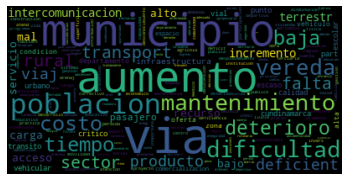

In [ ]:
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Analisis 1-1


In [ ]:
import pandas as pd
import numpy as np
import nltk, re, string
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
from unicodedata import normalize
nltk.download('stopwords')
nltk.download('wordnet')
plt.style.use("ggplot")
nltk.download('omw-1.4')
import seaborn as sns
np.random.seed(0)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
# Funciones
def normalize(s):
    replacements = (
        ("á", "a"),
        ("é", "e"),
        ("í", "i"),
        ("ó", "o"),
        ("ú", "u"),
        ("ñ", "n")
    )
    for a, b in replacements:
        s = s.replace(a, b).replace(a.upper(), b.upper())
    return s

def normalize_document(doc):
    doc=str(doc)
    #Borro las palabras que tienen @
    doc=str(doc)
    doc= re.sub(r'@\S+','',doc)
    # Se eliminan caracteres especiales
    doc = re.sub(r'[^a-zA-Z\s]', '', doc, re.I|re.A)
    # Se convierten los téxtos a minúsculas
    doc = doc.lower()
    doc = doc.strip() # esta borra los espacios al principio y al final de la frase. 
    #doc = re.sub(r'respuesta','',doc, re.I|re.A)

      
    # Tokenizado de documento
    tokens = wpt.tokenize(doc) #Divido la frase en palabras 
    # Eliminación de stopwords
    tokens = [token for token in tokens if token not in stop_words]
    # Lematización
    tokens = [lem.lemmatize(token) for token in tokens]
    # Retornamos una versión filtrada del texto
    doc = ' '.join(tokens)
    return doc

In [ ]:
# Definimos los tokenizer y lemmatizer
wpt = nltk.WordPunctTokenizer()
lem = nltk.WordNetLemmatizer()
# Descargamos las stopwords para inglés
stop_words = nltk.corpus.stopwords.words('spanish')

In [ ]:
df=pd.read_csv('ArchivoProblemas.csv', header=None) 

In [ ]:
df.head(2)

,0
0,"Problem;3655;""Deficiencia en las reglas;"" prot..."
1,"Effect;18181;""Descoordinación institucional en..."


In [ ]:
datos=pd.DataFrame()
datos['TIPO']=df[0].str.split(";",1).str[0]
datos['ID']=df[0].str.split(";",2).str[1]
datos['DESCRIPCION']=df[0].str.split(";",2).str[2]
datos['DESCRIPCION']=datos.apply(lambda x:normalize(x['DESCRIPCION'].replace('"',"").replace(";","")),axis=1)


In [ ]:
len(datos['DESCRIPCION'])


13037

In [ ]:
datos.head()


,TIPO,ID,DESCRIPCION
0,Problem,3655,Deficiencia en las reglas protocolos y proceso...
1,Effect,18181,Descoordinacion institucional en el tema de at...
2,Effect,18182,Ineficiencia e ineficacia en la atencion a vic...
3,Effect,18183,Inequidad social
4,Effect,18626,Baja capacidad de las entidades territoriales ...


In [ ]:
datos['DESCRIPCION']=list(map(normalize_document,datos['DESCRIPCION']))

In [ ]:
datos['DESCRIPCION_SEP']=datos['DESCRIPCION'].apply(lambda x: wpt.tokenize(str(x)))

In [ ]:
datos.head()

,TIPO,ID,DESCRIPCION,DESCRIPCION_SEP
0,Problem,3655,deficiencia reglas protocolos procesos corresp...,"[deficiencia, reglas, protocolos, procesos, co..."
1,Effect,18181,descoordinacion institucional tema atencion vi...,"[descoordinacion, institucional, tema, atencio..."
2,Effect,18182,ineficiencia ineficacia atencion victimas conf...,"[ineficiencia, ineficacia, atencion, victimas,..."
3,Effect,18183,inequidad social,"[inequidad, social]"
4,Effect,18626,baja capacidad entidades territoriales impleme...,"[baja, capacidad, entidades, territoriales, im..."


# DISTRIBUCION TIPO

In [ ]:
dist_tipo=pd.DataFrame(datos['TIPO'].value_counts())

In [ ]:
dist_tipo

,TIPO
Effect,5976
Cause,5307
Problem,1754


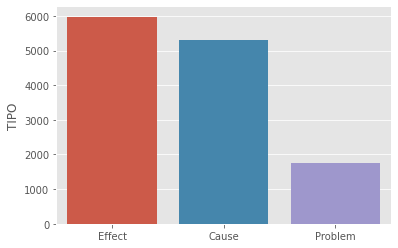

In [ ]:
sns.barplot(data=dist_tipo, x=dist_tipo.index, y='TIPO')

# RECUENTO CASOS 

In [ ]:
len(datos['ID'].value_counts())

9592

En total hay 9592 casos registrados.

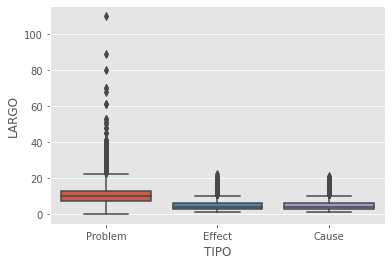

In [ ]:
sns.boxplot(x='TIPO', y='LARGO', data=datos)
plt.show()

In [ ]:
datos2=datos[datos['LARGO']<21]

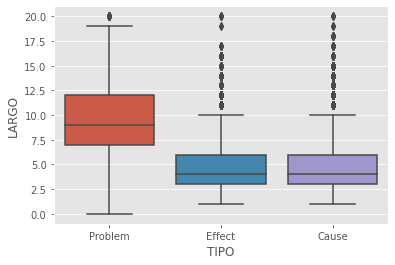

In [ ]:
sns.boxplot(x='TIPO', y='LARGO', data=datos2)
plt.show()

In [ ]:
datos['LARGO']=datos.apply(lambda x: len(x['DESCRIPCION_SEP']),axis=1)

In [ ]:
datos.groupby("TIPO")['LARGO'].mean()

TIPO
Cause       5.020727
Effect      4.778280
Problem    11.499430
Name: LARGO, dtype: float64

In [ ]:
datos.groupby("TIPO")['LARGO'].std()

TIPO
Cause      2.794363
Effect     2.276135
Problem    7.926160
Name: LARGO, dtype: float64

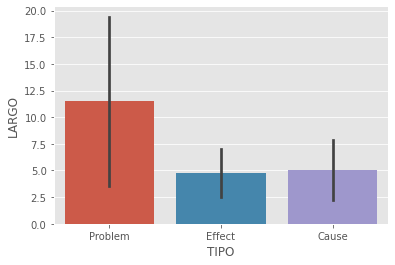

In [ ]:
sns.barplot(data=datos, x="TIPO", y='LARGO',ci="sd",estimator=np.mean)

# Word Clouds

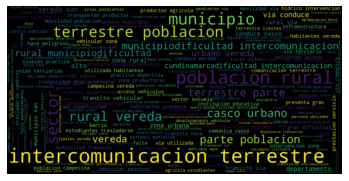

In [ ]:
wordcloud = WordCloud(width=1600, height=800).generate(''.join(datos[datos['TIPO']=="Problem"]['DESCRIPCION']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

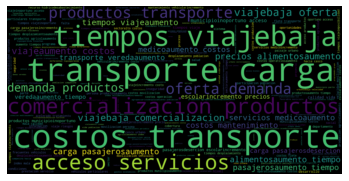

In [ ]:
wordcloud = WordCloud(width=1600, height=800).generate(''.join(datos[datos['TIPO']=="Effect"]['DESCRIPCION']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

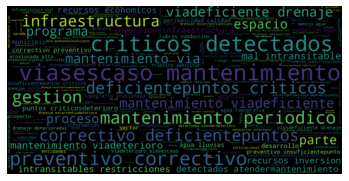

In [ ]:
wordcloud = WordCloud(width=1600, height=800).generate(''.join(datos[datos['TIPO']=="Cause"]['DESCRIPCION']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()